In [60]:
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift
from sklearn import metrics
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import normalize

Reading data set

In [61]:
df = pd.read_csv("data.csv", delimiter=",", names=["c_1", "c_2"])
df

,c_1,c_2
0,-0.635700,0.472938
1,0.686418,-0.481948
2,0.882468,0.086016
3,1.566876,0.422147
4,-0.788983,0.743609
...,...,...
3995,0.399613,-0.298868
3996,1.317083,-0.012860
3997,0.510458,-0.232525
3998,0.944405,0.316614


In [62]:
df.describe()

,c_1,c_2
count,4000.000000,4000.000000
mean,0.498493,0.250990
std,0.885386,0.522932
min,-1.612583,-1.009196
25%,-0.118622,-0.192505
50%,0.511190,0.260445
75%,1.111960,0.693031
max,2.385769,1.438948


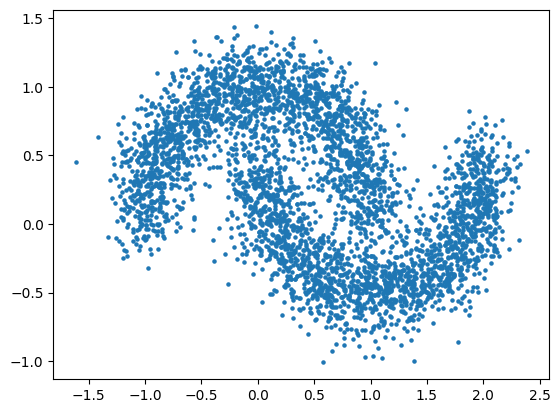

In [63]:
plt.scatter(df["c_1"], df["c_2"], s=5)

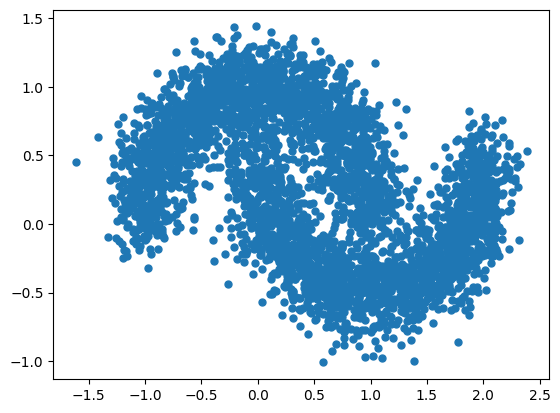

In [5]:
plt.scatter(df["c_1"], df["c_2"], s=25)

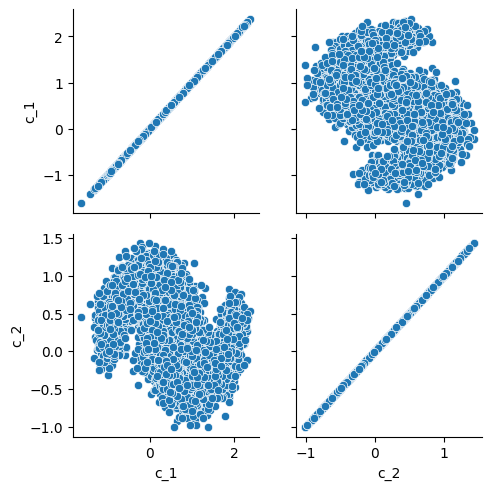

In [6]:
#pairwise relationships in the dataset
import seaborn as sns
a = sns.PairGrid(df)
a.map(sns.scatterplot)

In [7]:
scores = []
values = np.arange(2, 11)

In [8]:
for num_clusters in values:
  kmeans = KMeans(n_clusters = num_clusters, 
                  init = 'k-means++', 
                  max_iter = 500, 
                  n_init = 'auto', 
                  random_state = 4)
  kmeans.fit(df)
  score = metrics.silhouette_score(df, kmeans.labels_, metric = 'euclidean', sample_size = len(df))
  print("\nNumber of clusters =", num_clusters)
  print("Silhouette score = %.3f"%score)
  scores.append(score)


Number of clusters = 2
Silhouette score = 0.475

Number of clusters = 3
Silhouette score = 0.401

Number of clusters = 4
Silhouette score = 0.427

Number of clusters = 5
Silhouette score = 0.424

Number of clusters = 6
Silhouette score = 0.446

Number of clusters = 7
Silhouette score = 0.434

Number of clusters = 8
Silhouette score = 0.420

Number of clusters = 9
Silhouette score = 0.423

Number of clusters = 10
Silhouette score = 0.409


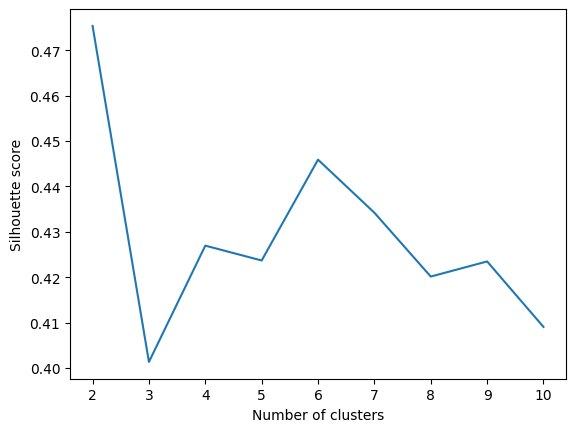

In [9]:
plt.plot(range(2,11),scores)                    # set plot title
plt.xlabel('Number of clusters')                # Set x axis name
plt.ylabel('Silhouette score')                  # Set y axis name
plt.show()

In [10]:
kmeans = KMeans(n_clusters = 2,            # number of clusters
                init = 'k-means++',        # Initialization method for kmeans
                max_iter = 500,            # Maximum number of iterations
                n_init = 'auto',           
                random_state = 4)          

In [11]:
y_kmeans = kmeans.fit_predict(df)
y_kmeans

array([0, 1, 1, ..., 1, 1, 1], dtype=int32)

In [12]:
X = np.array(df)
X

array([[-0.63569996,  0.47293803],
       [ 0.68641771, -0.48194764],
       [ 0.8824677 ,  0.08601564],
       ...,
       [ 0.51045831, -0.23252459],
       [ 0.9444047 ,  0.31661357],
       [ 0.69048658, -0.48971182]])

In [13]:
X[0][0]

-0.6356999573694998

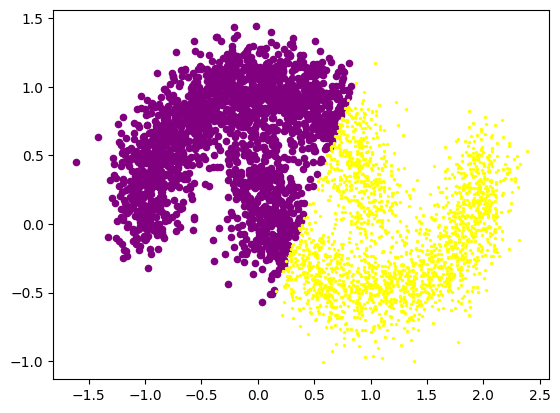

In [14]:
plt.scatter(X[y_kmeans==0, 0],  X[y_kmeans==0,1],s=20, c='purple', label ='Cluster 1')
plt.scatter(X[y_kmeans==1, 0], X[y_kmeans==1, 1], s=2, c='yellow', label ='Cluster 2')

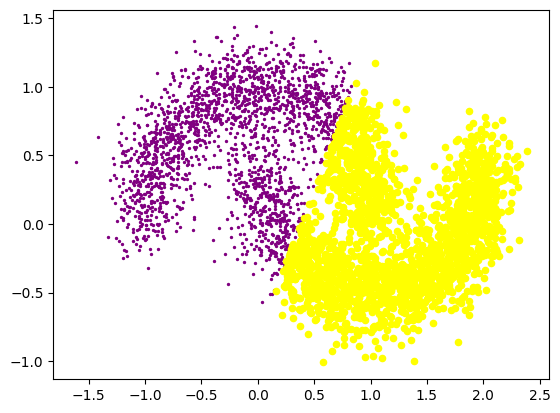

In [15]:
plt.scatter(X[y_kmeans==0, 0],  X[y_kmeans==0,1],s=2, c='purple', label ='Cluster 1')
plt.scatter(X[y_kmeans==1, 0], X[y_kmeans==1, 1], s=20, c='yellow', label ='Cluster 2')

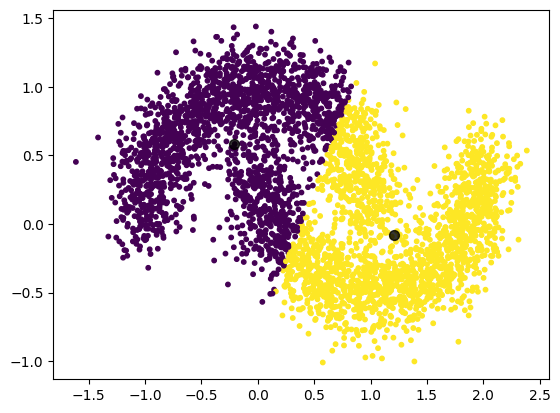

In [16]:
centers = kmeans.cluster_centers_
plt.scatter(df["c_1"], df["c_2"], c=y_kmeans,s=10)
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=50, alpha=0.8)
plt.show()

GaussianMixture

In [17]:
from sklearn.mixture import GaussianMixture

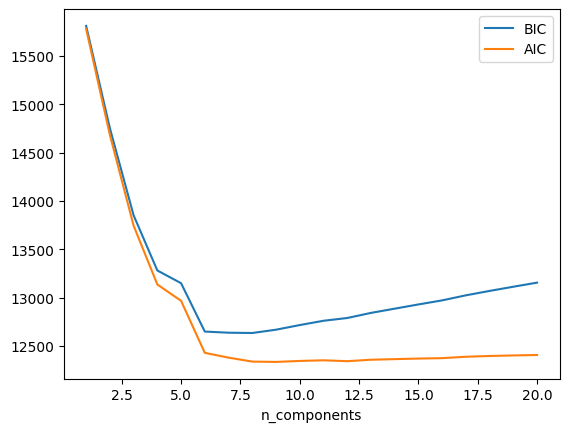

In [18]:
n_components = np.arange(1,21)
models = [GaussianMixture(n, covariance_type = 'full', random_state = 0).fit(df) for n in n_components]
plt.plot(n_components, [m.bic(df) for m in models], label = 'BIC')
plt.plot(n_components, [m.aic(df) for m in models], label = 'AIC')
plt.legend(loc = 'best')
plt.xlabel('n_components');
plt.show()


In [19]:
gmm = GaussianMixture(n_components = 2)
gmm.fit(df)

GaussianMixture(n_components=2)

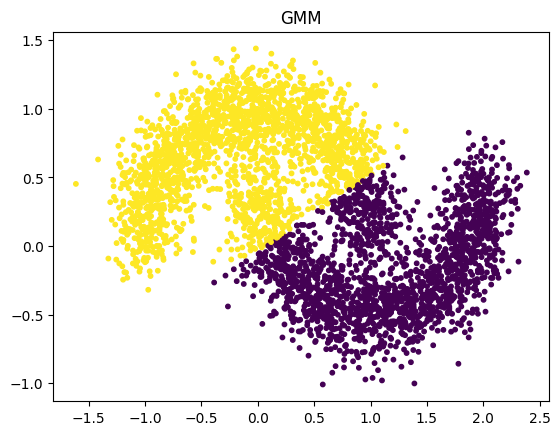

In [20]:
labels = gmm.predict(df)
plt.scatter(df["c_1"], df["c_2"], c = labels, cmap = 'viridis', s = 10)
plt.title('GMM')
plt.show()

In [21]:
score = metrics.silhouette_score(df,labels, metric = 'euclidean', sample_size = len(df))
print('Silhoutte score- %.3f'%score)

Silhoutte score- 0.457


Mean shift

In [25]:
standard = StandardScaler() 
standard_scaled = standard.fit_transform(df)
features = df.columns
df_standard = pd.DataFrame(standard_scaled, columns=features)
df_s = df_standard

In [26]:
ms = MeanShift()
ms.fit(df_s)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

In [27]:
print("Center coordinate:\n",cluster_centers)
n_clusters_ = len(np.unique(labels))
print("Estimated clusters:", n_clusters_)

Center coordinate:
 [[-0.53474948  0.85209928]
 [ 0.54733763 -0.85561183]]
Estimated clusters: 2


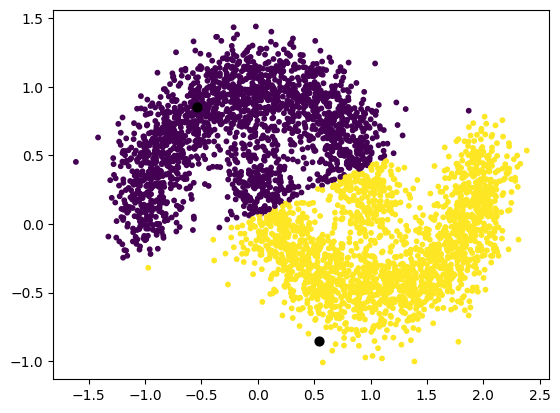

In [28]:
plt.scatter(df["c_1"], df["c_2"], c=labels, s=10)
plt.scatter(cluster_centers[:,0], cluster_centers[:,1], c='black', s=40)
plt.show()

In [29]:
y_ms_pred = ms.predict(df)
score = metrics.silhouette_score(df, ms.labels_, metric = 'euclidean', sample_size = len(df))
print('Silhoutte score- %.3f'%score)

Silhoutte score- 0.445


Agglomerative clustering

In [30]:
import numpy as nm  
import matplotlib.pyplot as mtp  
import pandas as pd 

In [31]:
x = df.values

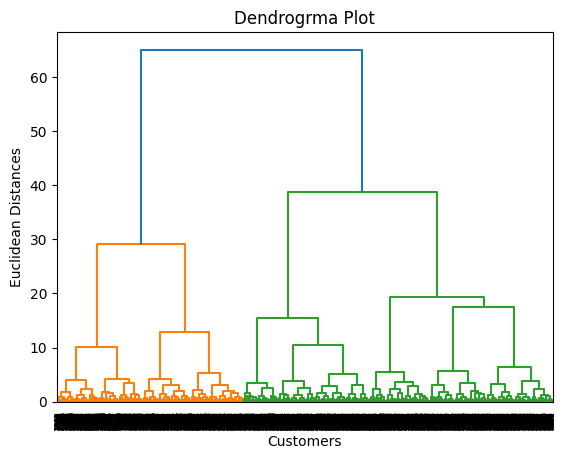

In [32]:
import scipy.cluster.hierarchy as shc  
dendro = shc.dendrogram(shc.linkage(x, method="ward"))  
mtp.title("Dendrogrma Plot")  
mtp.ylabel("Euclidean Distances")  
mtp.xlabel("Customers")  
mtp.show()  

In [33]:
from sklearn.cluster import AgglomerativeClustering  
hc= AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  

In [34]:
y_pred= hc.fit_predict(x) 

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


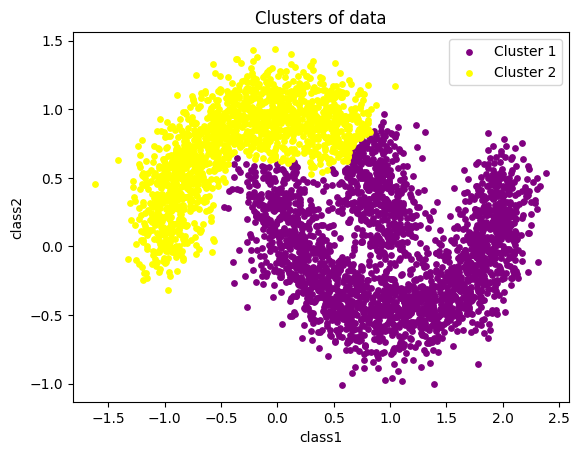

In [35]:
mtp.scatter(x[y_pred == 0, 0], x[y_pred == 0, 1], c = 'purple', label = 'Cluster 1',s = 15)  
mtp.scatter(x[y_pred == 1, 0], x[y_pred == 1, 1], c = 'yellow', label = 'Cluster 2', s=15)   
mtp.title('Clusters of data')  
mtp.xlabel('class1')  
mtp.ylabel('class2')  
mtp.legend()  
mtp.show()

In [36]:
score = metrics.silhouette_score(df, hc.labels_, metric = 'euclidean', sample_size = len(df))
print('Agglomerative Clustering scoreo- %.3f'%score)


Agglomerative Clustering scoreo- 0.418


Spectral clustering

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [65]:
X = df.values

In [66]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [67]:
X_normalized = normalize(X_scaled)

In [68]:
X_normalized = pd.DataFrame(X_normalized)

In [69]:
pca = PCA(n_components = 2)
X_principal = pca.fit_transform(X_normalized)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2']

In [70]:
X_principal.describe()


,P1,P2
count,4.000000e+03,4.000000e+03
mean,1.731948e-17,2.220446e-17
std,7.969695e-01,6.042171e-01
min,-9.967799e-01,-9.989952e-01
25%,-8.404221e-01,-5.326534e-01
50%,-1.824024e-02,-2.062321e-03
75%,8.457616e-01,5.418416e-01
max,1.003220e+00,1.001001e+00


In [71]:
from sklearn.cluster import SpectralClustering

In [72]:
colours = {}
colours[0] = 'b'
colours[1] = 'y'
s_c=[]

In [75]:

spectral_model_rbf = SpectralClustering(n_clusters = 2, eigen_solver='arpack', affinity ='rbf',gamma=1, n_neighbors=100,eigen_tol=0.0)


In [76]:
labels_rbf = spectral_model_rbf.fit_predict(X_normalized)

In [77]:
cvec = [colours[label] for label in labels_rbf]

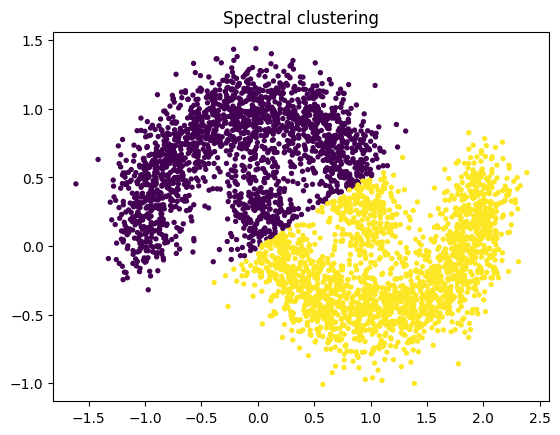

In [78]:
plt.scatter(df["c_1"], df["c_2"], c=labels_rbf, s=8)
plt.title('Spectral clustering')
#plt.legend(('Label 0', 'Label 1'))
plt.show()

In [79]:
print(silhouette_score(X, labels_rbf))

0.4550656483135509


In [ ]:
spectral_model_nn = SpectralClustering(n_clusters = 2, affinity ='nearest_neighbors',gamma=1.0,n_neighbors=100,eigen_tol=0.0)

In [ ]:
labels_nn = spectral_model_nn.fit_predict(X_normalized)

In [ ]:
cvec = [colours[label] for label in labels_nn]

In [ ]:
print(silhouette_score(X, labels_nn))

0.2081170367420072


DBscan

In [37]:
import sys
np.set_printoptions(threshold = sys.maxsize)
from sklearn.cluster import DBSCAN

In [38]:
X=df.values

In [39]:
y_pred = DBSCAN(eps = 0.3, min_samples = 300).fit(X)
labels = y_pred.labels_
core_samples_mask = np.zeros_like(y_pred.labels_, dtype=bool)
core_samples_mask[y_pred.core_sample_indices_] = True

In [40]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print('Number of clusters', n_clusters_)

no_clusters = len(np.unique(labels))
no_noise = np.sum(np.array(labels) == -1, axis=0)

Number of clusters 2


In [51]:
from sklearn import cluster
dbscan = cluster.DBSCAN(eps=0.3, min_samples=300)
clustering_labels = dbscan.fit_predict(df)

In [47]:
#y_p=DBSCAN(eps = 0.3, min_samples = 300)
#labels_db = DBSCAN(eps = 0.3, min_samples = 300).fit_predict(df)

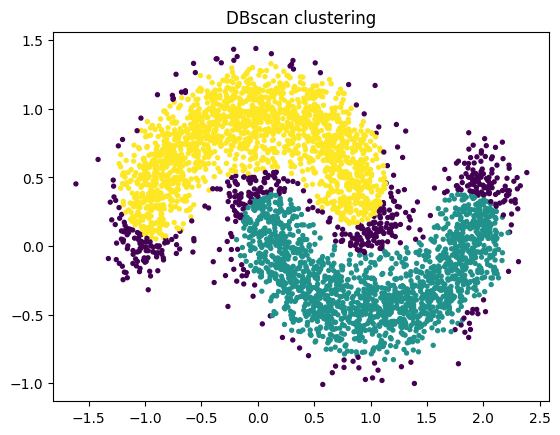

In [52]:
plt.scatter(df["c_1"], df["c_2"], c=clustering_labels, s=8)
plt.title('DBscan clustering')
#plt.legend(('Label 0', 'Label 1'))
plt.show()

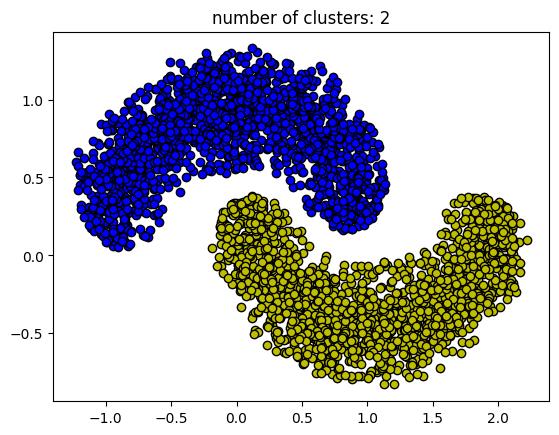

In [42]:
unique_labels = set(labels)
colors = ['y', 'b', 'g', 'r']

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        # col = 'k'
        continue
  
    class_member_mask = (labels == k)
  
    xy = X[class_member_mask & core_samples_mask]
    
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k',
             markersize=6)
  
    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k',
             markersize=6)
y_predicted = np.array([i for i in labels if i != -1])
plt.title('number of clusters: %d' % n_clusters_)
plt.show()

In [53]:
df['labels'] = clustering_labels

In [55]:
score = metrics.silhouette_score(df, df['labels'])
print(score)

0.4557694150214839


In [ ]:
kmeans = KMeans(n_clusters = 2,            # number of clusters
                init = 'k-means++',        # Initialization method for kmeans
                max_iter = 500,            # Maximum number of iterations
                n_init = 'auto',           
                random_state = 4)   

In [80]:
y_pred = kmeans.fit_predict(df)
y_pred

array([0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,

In [82]:
# exporting output
file = open("test_data_class_labels.txt", "w")
np.savetxt(file, y_pred, fmt='%d')
    
file.close()